#QML-HEP GSoC 2023 Task Solutions 


##Installing Required Package 

In [ ]:
!pip install cirq
!pip install qiskit
!pip install pylatexenc
!pip install pennylane
!pip install -U tensorflow-addons
# # !pip install -q tensorflow==2.3.1
# !pip install -q tensorflow-quantum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 KB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.6/221.6 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 K

##TASK VI

In this task you should implement a simple representation learning scheme based on a contrastive loss:
1. Load the MNIST dataset
2. Write a function which takes an image and prepares a quantum state. This function should have trainable parameters which we want to learn in order to have good quantum representations
3. Create a circuit with which takes two images and embeds both as quantum states with the function you wrote before. Afterwards the circuit should perform a SWAP test between the two states. In the end the measurement should give the fidelity of the quantum states.
4. Train the circuit parameters with a contrastive loss: For two MNIST images in the same class the fidelity should be maximized, while for images of different classes the fidelity should be minimized.


In [ ]:
import tensorflow as tf
import pennylane as qml
import numpy as np
from tensorflow.keras.datasets import mnist

###Defining the hyperparameters 

In [ ]:
n_epochs = 30 
n_layers = 1  
n_train = 50  
n_test = 30    
n_wires = 4

PREPROCESS = True           
np.random.seed(42)           
tf.random.set_seed(42)  
     

###Spliting the data into train and test 

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Normalize pixel values within 0 and 1
x_train = x_train / 255
x_test = x_test / 255


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Define quantum circuit functions
def quantum_circuit(params, x):
    """
    A quantum circuit that performs angle embedding and strongly entangling layers
    on the input tensor x with the given parameters.

    Args:
        params (array-like): An array of parameters for the circuit.
        x (array-like): The input tensor to the circuit.

    Returns:
        A list of expectation values for each wire in the circuit.
    """
    qml.templates.AngleEmbedding(x, wires=range(num_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(num_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

In [ ]:
def contrastive_loss(y_true, y_pred, margin=1):
    """
    Compute the contrastive loss for a pair of predictions.

    Args:
        y_true (tensor): The true labels for the pair of predictions.
        y_pred (tensor): The predicted labels for the pair of predictions.
        margin (float): The margin value for the contrastive loss.

    Returns:
        tensor: The contrastive loss value for the pair of predictions.
    """
    loss = y_true * tf.square(tf.maximum(0., margin - y_pred)) + (1 - y_true) * tf.square(y_pred)
    return tf.reduce_mean(loss)

In [ ]:
def swap_test_circuit(params, x1, x2):
    """
    A quantum circuit that performs a SWAP test on the two input tensors
    x1 and x2 with the given parameters.

    Args:
        params (array-like): An array of parameters for the circuit.
        x1 (array-like): The first input tensor to the circuit.
        x2 (array-like): The second input tensor to the circuit.

    Returns:
        The expectation value for the first wire in the circuit.
    """
    qml.Hadamard(wires=0)
    qml.CSWAP(wires=[0, 1, 2])
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.CSWAP(wires=[0, 1, 2])
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

In [ ]:
device = qml.device("default.qubit", wires=4)

In [ ]:
@qml.qnode(device, interface="tf")
def quantum_model(inputs, params):
    """
    A quantum circuit model with Angle Embedding and Strongly Entangling Layers.

    Args:
        inputs (tf.Tensor): Input tensor.
        params (np.ndarray): Parameters for the quantum circuit.

    Returns:
        list: A list of expectation values of Pauli Z operators for each wire.
    """
    return quantum_circuit(params, inputs)

In [ ]:
@qml.qnode(device, interface="tf")
def swap_test(inputs_1, inputs_2, params):
    """
    A quantum circuit model for swap test.

    Args:
        inputs_1 (tf.Tensor): First input tensor.
        inputs_2 (tf.Tensor): Second input tensor.
        params (np.ndarray): Parameters for the quantum circuit.

    Returns:
        float: An expectation value of Pauli Z operator for wire 0.
    """
    return swap_test_circuit(params, inputs_1, inputs_2)

In [ ]:
params = np.random.randn(10) 

In [ ]:
def classical_model():
    """
    A classical model with two dense layers and softmax activation.

    Returns:
        tf.keras.Model: A keras model.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
model = classical_model()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=lambda y_true, y_pred: contrastive_loss(y_true, y_pred, margin=1))

In [ ]:
params = np.random.normal(loc=0, scale=0.1, size=(n_layers, n_wires))

In [ ]:
c_model = classical_model()

c_history = c_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=4,
    epochs=10,
    verbose=2,
)

Epoch 1/10
15000/15000 - 51s - loss: 0.2011 - accuracy: 0.9401 - val_loss: 0.1157 - val_accuracy: 0.9666 - 51s/epoch - 3ms/step
Epoch 2/10
15000/15000 - 55s - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.1242 - val_accuracy: 0.9618 - 55s/epoch - 4ms/step
Epoch 3/10
15000/15000 - 44s - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0750 - val_accuracy: 0.9798 - 44s/epoch - 3ms/step
Epoch 4/10
15000/15000 - 65s - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0871 - val_accuracy: 0.9765 - 65s/epoch - 4ms/step
Epoch 5/10
15000/15000 - 81s - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.1206 - val_accuracy: 0.9701 - 81s/epoch - 5ms/step
Epoch 6/10
15000/15000 - 72s - loss: 0.0392 - accuracy: 0.9883 - val_loss: 0.0893 - val_accuracy: 0.9793 - 72s/epoch - 5ms/step
Epoch 7/10
15000/15000 - 54s - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.1002 - val_accuracy: 0.9768 - 54s/epoch - 4ms/step
Epoch 8/10
15000/15000 - 54s - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.1111 - val_accuracy: 0.9763

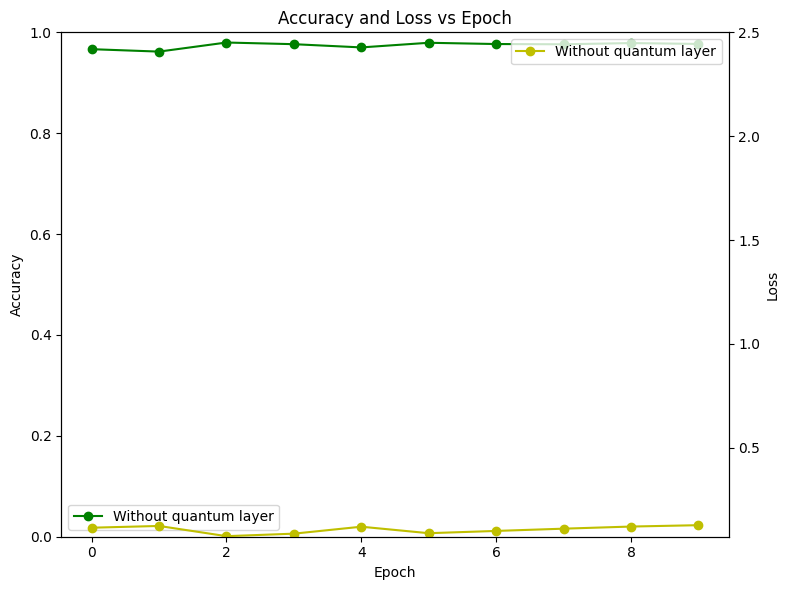

In [ ]:

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(c_history.history["val_loss"], "-oy", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.legend()

plt.title('Accuracy and Loss vs Epoch')
plt.tight_layout()
plt.show()

In [ ]:
weight_shapes = {"weights": (2, 2), "bias": (2,)}


def Quantun_Model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Lambda(lambda x: np.array([x]*n_wires)),  # Replicate input for multiple wires
        tf.keras.layers.Permute((2, 1)),  # Transpose to match wire order
        qml.qnn.KerasLayer(quantum_model, output_dim=n_wires,weight_shapes=weight_shapes),  # Quantum layer
        tf.keras.layers.Dense(10, activation='softmax')  # Final dense layer
    ])
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


In [ ]:
model = Quantun_Model()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=lambda y_true, y_pred: contrastive_loss(y_true, y_pred, margin=1))

In [ ]:
q_model = Quantun_Model()

q_history = q_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=4,
    epochs=10,
    verbose=2,
)

Epoch 1/10
15000/15000 - 54s - loss: 0.1986 - accuracy: 0.9400 - val_loss: 0.1272 - val_accuracy: 0.9621 - 54s/epoch - 4ms/step
Epoch 2/10
15000/15000 - 72s - loss: 0.0960 - accuracy: 0.9707 - val_loss: 0.1124 - val_accuracy: 0.9659 - 72s/epoch - 5ms/step
Epoch 3/10
15000/15000 - 58s - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.0774 - val_accuracy: 0.9772 - 58s/epoch - 4ms/step
Epoch 4/10
15000/15000 - 54s - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0943 - val_accuracy: 0.9751 - 54s/epoch - 4ms/step
Epoch 5/10
15000/15000 - 56s - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.1117 - val_accuracy: 0.9726 - 56s/epoch - 4ms/step
Epoch 6/10
15000/15000 - 40s - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.1134 - val_accuracy: 0.9749 - 40s/epoch - 3ms/step
Epoch 7/10
15000/15000 - 57s - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.1109 - val_accuracy: 0.9771 - 57s/epoch - 4ms/step
Epoch 8/10
15000/15000 - 38s - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.1183 - val_accuracy: 0.9767

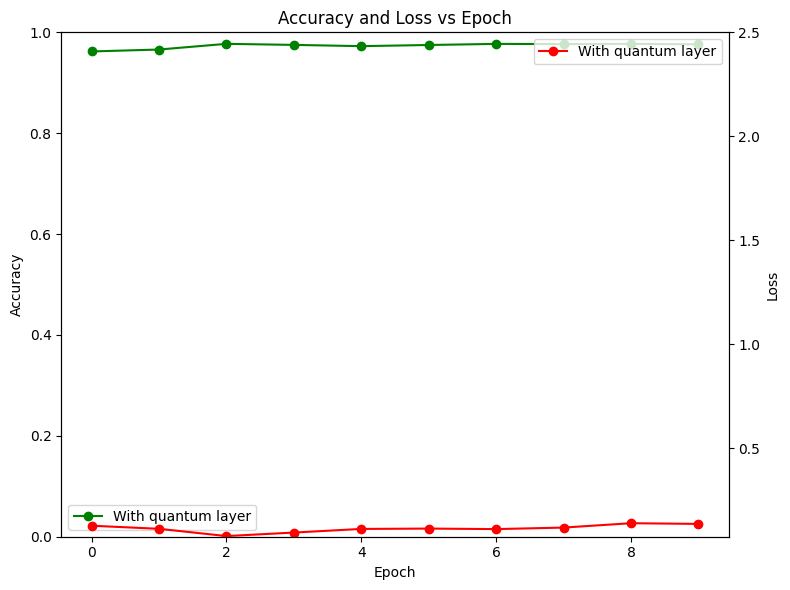

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

ax1.plot(q_history.history["val_accuracy"], "-og", label="With quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-or", label="With quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.legend()

plt.title('Accuracy and Loss vs Epoch')
plt.tight_layout()
plt.show()